In [1]:
% pylab inline
import json
import pandas as pd
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('directors.json') as data_file:    
    data_dir = json.load(data_file)
with open('actors.json') as data_file:    
    data_act = json.load(data_file)

new_dir = [(x['average_gross'],x['movie_count'],x['years_active'],x['budgets']) for x in data_dir]
new_act = [(x['average_gross'],x['movie_count'],x['years_active'],x['budgets']) for x in data_act]

df_dir = pd.DataFrame.from_records(new_dir)
df_act = pd.DataFrame.from_records(new_act)

col = ["average_gross","movie_count","years_active","budget","bin_young_old",]
log_col = ['log_average', 'log_years', 'log_count', 'log_budget', "bin_young_old"]

df_dir.columns = col[0:4]
df_dir[col[0:4]] = df_dir[col[0:4]].astype(int)
df_act.columns = col[0:4]
df_act[col[0:4]] = df_act[col[0:4]].astype(int)

df_dir[log_col[0]] = log(df_dir.average_gross)
df_dir[log_col[1]] = log(df_dir.movie_count)
df_dir[log_col[2]] = log(df_dir.years_active)
df_dir[log_col[3]] = log(df_dir.budget)

df_act[log_col[0]] = log(df_act.average_gross)
df_act[log_col[1]] = log(df_act.movie_count)
df_act[log_col[2]] = log(df_act.years_active)
df_act[log_col[3]] = log(df_act.budget)

f = lambda x: 1 if x>13 else 0
df_dir['bin_young_old'] = df_dir.applymap(f).years_active
df_act['bin_young_old'] = df_act.applymap(f).years_active

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1048c05d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13903bc50>]], dtype=object)

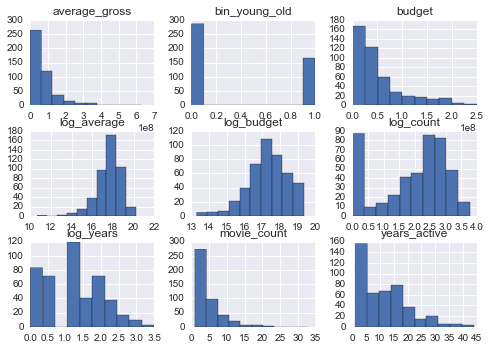

In [93]:
pd.DataFrame.hist(df_dir)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139142fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x139d94190>]], dtype=object)

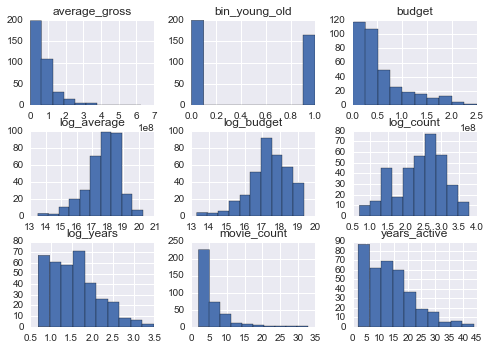

In [94]:
pd.DataFrame.hist(df_dir[df_dir.years_active>1])

In [95]:
df_dir = df_dir[df_dir.years_active>1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139dcded0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13aaba390>]], dtype=object)

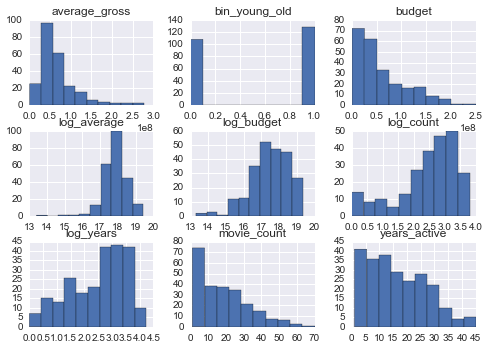

In [96]:
pd.DataFrame.hist(df_act)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c4cb7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x137ff0450>]], dtype=object)

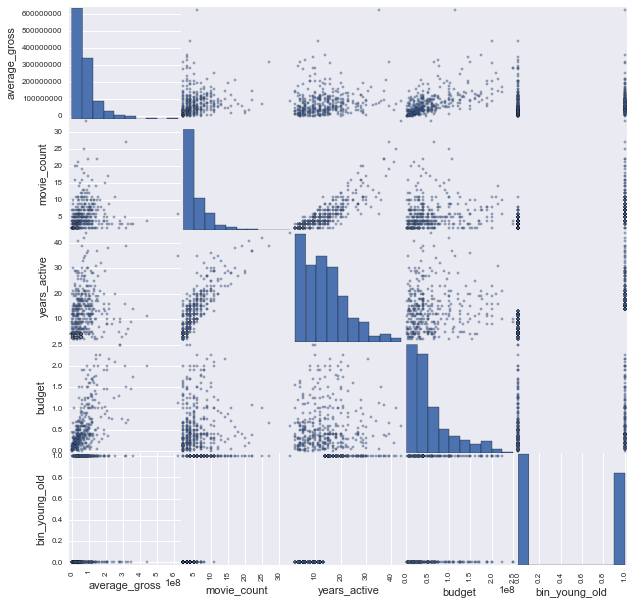

In [98]:
pd.scatter_matrix(df_dir[col], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ecc1310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13fef8410>]], dtype=object)

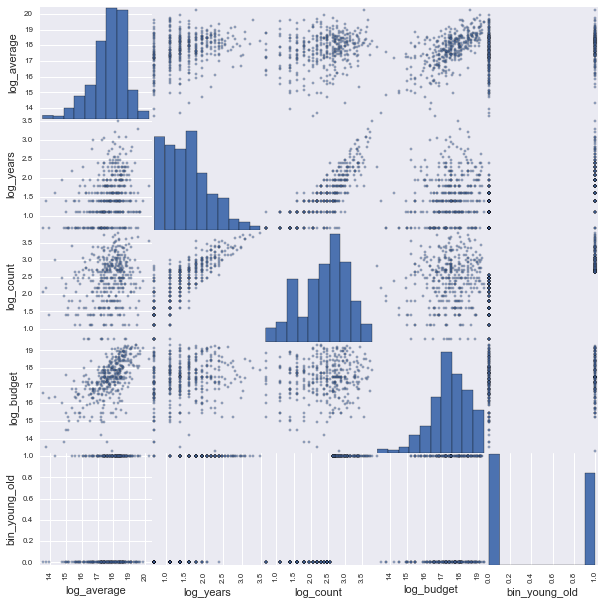

In [99]:
pd.scatter_matrix(df_dir[log_col], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1407c7450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x142887f50>]], dtype=object)

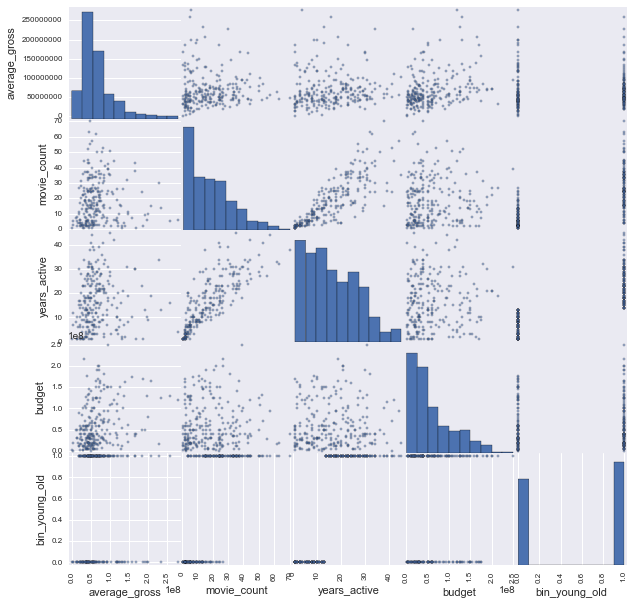

In [100]:
pd.scatter_matrix(df_act[col], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14296da50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x144a40150>]], dtype=object)

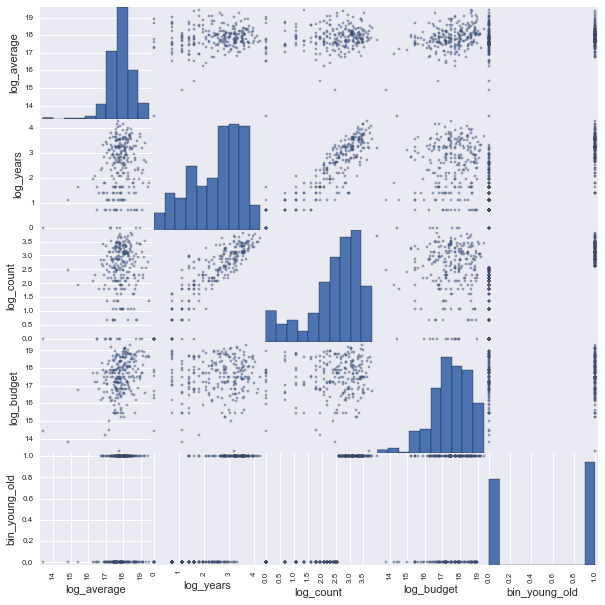

In [101]:
pd.scatter_matrix(df_act[log_col], figsize=(10, 10))

In [102]:
X = sm.add_constant(df_dir[col[1:]])
y = df_dir[col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_gross   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     55.20
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           2.98e-36
Time:                        07:25:43   Log-Likelihood:                -7023.0
No. Observations:                 364   AIC:                         1.406e+04
Df Residuals:                     359   BIC:                         1.408e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          1.376e+07   6.75e+06      2.038      0.042      4.85e+05   2.7e+07
movie_count   -1.341e+06   1.34e+06     -0.997      0.319     -3.98e+06   1.3e+06
years_active   2.283e+06   9.03e+05      2.529      0.012      5.08e+05  4.06e+06
budget            0.8142      0.057     14.228      0.000         0.702     0.927
bin_young_old -1.583e+07   1.02e+07     -1.548      0.123     -3.59e+07  4.28e+06
==============================================================================
Omnibus:                      243.196   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3233.916
Skew:                           2.624   Prob(JB):                         0.00
Kurtosis:                      16.627   Cond. No.                     2.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
X = sm.add_constant(df_dir[log_col[1:]])
y = df_dir[log_col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_average   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     70.01
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           8.90e-44
Time:                        07:26:33   Log-Likelihood:                -437.15
No. Observations:                 364   AIC:                             884.3
Df Residuals:                     359   BIC:                             903.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             7.1676      0.687     10.438      0.000         5.817     8.518
log_years         0.3548      0.120      2.963      0.003         0.119     0.590
log_count        -0.0813      0.126     -0.643      0.521        -0.330     0.167
log_budget        0.5840      0.039     14.926      0.000         0.507     0.661
bin_young_old     0.0832      0.138      0.605      0.546        -0.187     0.354
==============================================================================
Omnibus:                       25.788   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.411
Skew:                          -0.419   Prob(JB):                     3.07e-11
Kurtosis:                       4.577   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
X = sm.add_constant(df_dir[log_col[-2]])
y = df_dir[log_col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_average   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           1.94e-42
Time:                        07:26:58   Log-Likelihood:                -448.26
No. Observations:                 364   AIC:                             900.5
Df Residuals:                     362   BIC:                             908.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9847      0.688     10.149      0.000         5.631     8.338
log_budget     0.6169      0.039     15.627      0.000         0.539     0.695
==============================================================================
Omnibus:                       33.141   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.627
Skew:                          -0.490   Prob(JB):                     4.61e-16
Kurtosis:                       4.923   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
X = sm.add_constant(df_dir[['log_budget','log_years']])
y = df_dir[log_col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_average   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           8.10e-46
Time:                        07:28:09   Log-Likelihood:                -437.41
No. Observations:                 364   AIC:                             880.8
Df Residuals:                     361   BIC:                             892.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.0662      0.669     10.560      0.000         5.750     8.382
log_budget     0.5833      0.039     14.946      0.000         0.507     0.660
log_years      0.3262      0.069      4.710      0.000         0.190     0.462
==============================================================================
Omnibus:                       27.048   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.799
Skew:                          -0.433   Prob(JB):                     5.65e-12
Kurtosis:                       4.633   Cond. No.                         277.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
X = sm.add_constant(df_act[col[1:]])
y = df_act[col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_gross   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     6.379
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           6.92e-05
Time:                        07:28:22   Log-Likelihood:                -4500.9
No. Observations:                 237   AIC:                             9012.
Df Residuals:                     232   BIC:                             9029.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          4.926e+07   6.08e+06      8.097      0.000      3.73e+07  6.12e+07
movie_count   -4.127e+05   3.32e+05     -1.241      0.216     -1.07e+06  2.42e+05
years_active   8.321e+05   5.88e+05      1.415      0.158     -3.27e+05  1.99e+06
budget            0.2613      0.054      4.831      0.000         0.155     0.368
bin_young_old -5.338e+06   9.92e+06     -0.538      0.591     -2.49e+07  1.42e+07
==============================================================================
Omnibus:                       94.060   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.969
Skew:                           1.775   Prob(JB):                     2.38e-59
Kurtosis:                       6.838   Cond. No.                     2.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
X = sm.add_constant(df_act[log_col[1:]])
y = df_act[log_col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_average   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     11.81
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           9.57e-09
Time:                        07:28:37   Log-Likelihood:                -226.00
No. Observations:                 237   AIC:                             462.0
Df Residuals:                     232   BIC:                             479.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            13.4381      0.677     19.857      0.000        12.105    14.771
log_years        -0.0288      0.084     -0.343      0.732        -0.194     0.136
log_count         0.1613      0.100      1.609      0.109        -0.036     0.359
log_budget        0.2348      0.039      6.095      0.000         0.159     0.311
bin_young_old    -0.0518      0.133     -0.391      0.696        -0.313     0.209
==============================================================================
Omnibus:                       50.127   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.650
Skew:                          -0.825   Prob(JB):                     2.65e-39
Kurtosis:                       6.908   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
X = sm.add_constant(df_act[['log_budget']])
y = df_act[log_col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_average   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     39.34
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           1.69e-09
Time:                        07:30:42   Log-Likelihood:                -229.61
No. Observations:                 237   AIC:                             463.2
Df Residuals:                     235   BIC:                             470.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.6365      0.672     20.306      0.000        12.314    14.960
log_budget     0.2404      0.038      6.272      0.000         0.165     0.316
==============================================================================
Omnibus:                       64.138   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.043
Skew:                          -1.023   Prob(JB):                     1.03e-58
Kurtosis:                       7.781   Cond. No.                         284.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
X = sm.add_constant(df_act[['log_budget','log_count']])
y = df_act[log_col[0]]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_average   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     23.63
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           4.48e-10
Time:                        07:29:47   Log-Likelihood:                -226.15
No. Observations:                 237   AIC:                             458.3
Df Residuals:                     234   BIC:                             468.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.4982      0.665     20.289      0.000        12.187    14.809
log_budget     0.2324      0.038      6.118      0.000         0.158     0.307
log_count      0.1136      0.043      2.633      0.009         0.029     0.199
==============================================================================
Omnibus:                       49.402   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.884
Skew:                          -0.809   Prob(JB):                     6.42e-39
Kurtosis:                       6.897   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:            log_average   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           1.94e-42
Time:                        07:30:54   Log-Likelihood:                -448.26
No. Observations:                 364   AIC:                             900.5
Df Residuals:                     362   BIC:                             908.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9847      0.688     10.149      0.0

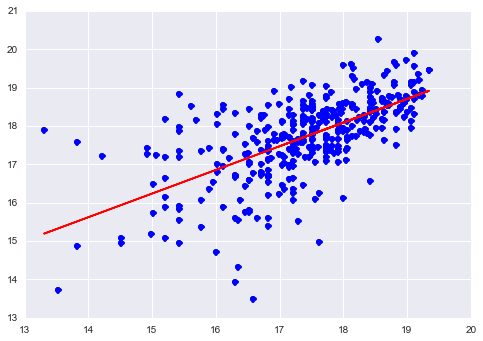

In [114]:
X = df_dir.log_budget
X = sm.add_constant(X)
model = sm.OLS(df_dir.log_average,X)
results = model.fit()
print(results.summary())

plt.plot(X.log_budget,df_dir.log_average, 'bo')
plt.plot(X.log_budget, results.fittedvalues, 'r')

                            OLS Regression Results                            
Dep. Variable:            log_average   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     35.49
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           6.08e-09
Time:                        07:35:49   Log-Likelihood:                -525.08
No. Observations:                 364   AIC:                             1054.
Df Residuals:                     362   BIC:                             1062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         16.9234      0.144    117.634      0.0

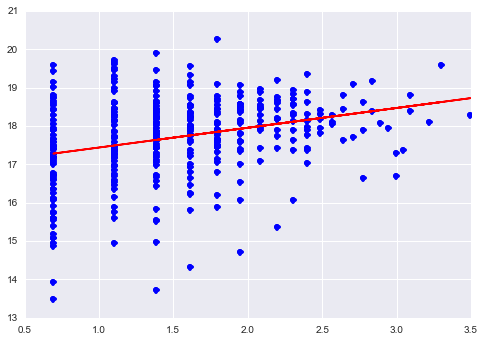

In [116]:
X = df_dir.log_years
X = sm.add_constant(X)
model = sm.OLS(df_dir.log_average,X)
results = model.fit()
print(results.summary())

plt.plot(X.log_years,df_dir.log_average, 'bo')
plt.plot(X.log_years, results.fittedvalues, 'r')

                            OLS Regression Results                            
Dep. Variable:            log_average   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     39.34
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           1.69e-09
Time:                        07:11:32   Log-Likelihood:                -229.61
No. Observations:                 237   AIC:                             463.2
Df Residuals:                     235   BIC:                             470.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.6365      0.672     20.306      0.0

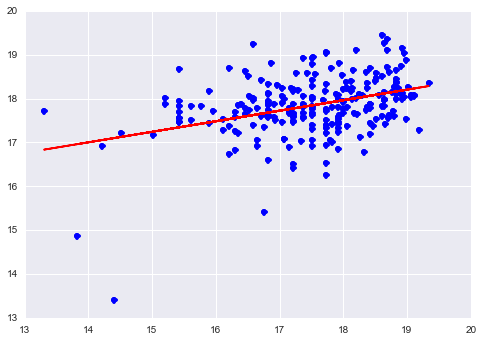

In [44]:
X = df_act.log_budget
X = sm.add_constant(X)
model = sm.OLS(df_act.log_average,X)
results = model.fit()
print(results.summary())

plt.plot(X.log_budget,df_act.log_average, 'bo')
plt.plot(X.log_budget, results.fittedvalues, 'r')

                            OLS Regression Results                            
Dep. Variable:            log_average   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     8.517
Date:                Mon, 12 Oct 2015   Prob (F-statistic):            0.00386
Time:                        07:36:02   Log-Likelihood:                -243.73
No. Observations:                 237   AIC:                             491.5
Df Residuals:                     235   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         17.5089      0.122    143.638      0.0

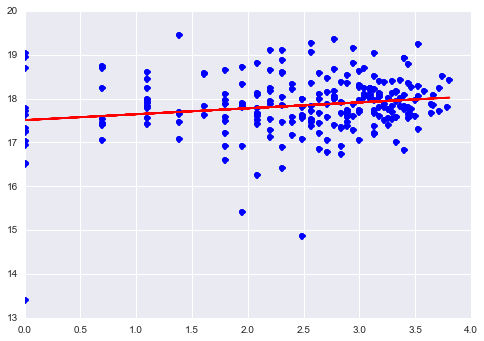

In [117]:
X = df_act.log_count
X = sm.add_constant(X)
model = sm.OLS(df_act.log_average,X)
results = model.fit()
print(results.summary())

plt.plot(X.log_count,df_act.log_average, 'bo')
plt.plot(X.log_count, results.fittedvalues, 'r')

In [118]:
def split_data(df):
    df = df.reindex(np.random.permutation(df.index))
    size = int(len(df)*.75)
    train = df[:size]
    test = df[size+1:]
    return [train,test]

In [156]:
train,test = split_data(df_dir)

X_train = train.log_budget
X_train = sm.add_constant(X_train)
y_train = train.log_average

X_test = test.log_budget
X_test = sm.add_constant(X_test)
y_test = test.log_average

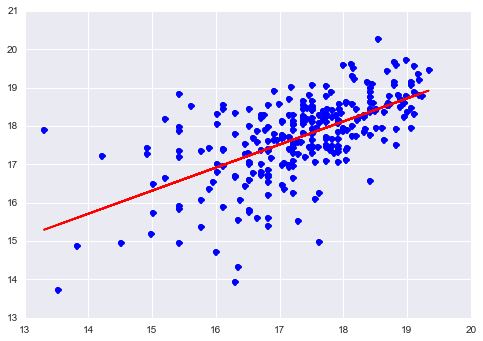

In [157]:
model = sm.OLS(y_train,X_train)
results = model.fit()

plt.plot(X_train.log_budget,y_train, 'bo')
plt.plot(X_train.log_budget, results.predict(X_train), 'r')

                            OLS Regression Results                            
Dep. Variable:            log_average   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     164.7
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           9.01e-30
Time:                        07:55:19   Log-Likelihood:                -340.70
No. Observations:                 273   AIC:                             685.4
Df Residuals:                     271   BIC:                             692.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.2927      0.814      8.954      0.0

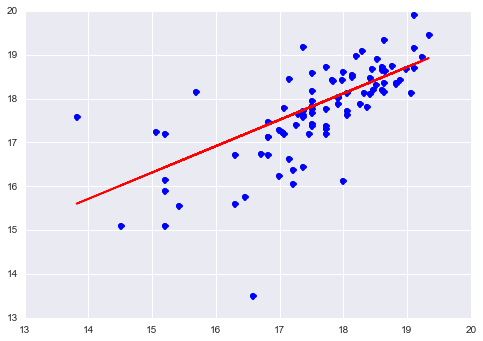

In [158]:
model = sm.OLS(y_train,X_train)
results = model.fit()

model_tr = sm.OLS(y_train,X_train)
model_te = sm.OLS(y_test,X_test)

results = model.fit()

print(results.summary())
print(model_te.fit().summary())

plt.plot(X_test.log_budget,y_test, 'bo')
plt.plot(X_test.log_budget, results.predict(X_test), 'r')

In [154]:
train,test = split_data(df_act)

X_train = train.log_budget
X_train = sm.add_constant(X_train)
y_train = train.log_average

X_test = test.log_budget
X_test = sm.add_constant(X_test)
y_test = test.log_average

                            OLS Regression Results                            
Dep. Variable:            log_average   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     41.45
Date:                Mon, 12 Oct 2015   Prob (F-statistic):           1.12e-09
Time:                        07:54:46   Log-Likelihood:                -173.18
No. Observations:                 177   AIC:                             350.4
Df Residuals:                     175   BIC:                             356.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         12.8740      0.774     16.622      0.0

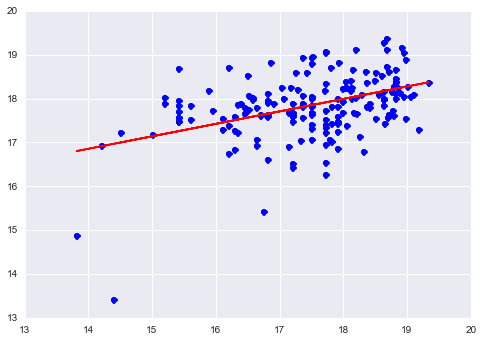

In [155]:
model = sm.OLS(y_train,X_train)
results = model.fit()

plt.plot(X_train.log_budget,y_train, 'bo')
plt.plot(X_train.log_budget, results.predict(X_train), 'r')

                            OLS Regression Results                            
Dep. Variable:            log_average   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.366
Date:                Mon, 12 Oct 2015   Prob (F-statistic):              0.247
Time:                        07:54:00   Log-Likelihood:                -53.255
No. Observations:                  59   AIC:                             110.5
Df Residuals:                      57   BIC:                             114.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         16.2548      1.328     12.240      0.0

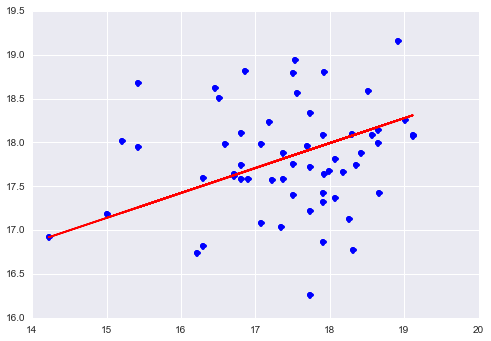

In [152]:
model_tr = sm.OLS(y_train,X_train)
model_te = sm.OLS(y_test,X_test)

results = model.fit()

print(results.summary())
print(model_te.fit().summary())

plt.plot(X_test.log_budget,y_test, 'bo')
plt.plot(X_test.log_budget, results.predict(X_test), 'r')